<a href="https://colab.research.google.com/github/TranPhu1999/Parallel_programing_face_mask_detection/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÁO CÁO ĐỒ ÁN MÔN "LẬP TRÌNH SONG SONG ỨNG DỤNG"
### GVHD: TRẦN TRUNG KIÊN
### THỰC HIỆN: Nhóm 02
### DANH SÁCH THÀNH VIÊN
  1. 1712667 - Lê Hữu Phúc
  2. 1712664 -Trần Đức Phú
  3. 1612355 - Lê Kinh Luân



[**Link đến github của nhóm**](https://github.com/TranPhu1999/Parallel_programing_face_mask_detection)

# 1. MÔ TẢ ỨNG DỤNG


*   **Tên ứng dụng:** Nhận diện người đeo khẩu trang với mô hình yolov3

*   **Input:** Một tấm ảnh người có/ không có/ đeo sai khẩu trang
*   **Output:** Ảnh được đánh bounding box kèm nhãn mask/ no_mask/ incorrect_mask


*   **Ý nghĩa thực tế:** Khi tình hình dịch đang còn lây lan mạnh trên cả nước thì việc đeo khẩu trang ra đường thực sự là rất cần thiết vì nó không chỉ bảo vệ bản thân mà còn bảo vệ cho những người xung quanh nên việc nhận diện người đeo khẩu trang sai cách thật sự rất quan trọng


*   **Lý do tăng tốc:** việc xác nhận người đeo khẩu trang sai cách rất quan trọng nên việc tăng tốc mô hình trên ảnh sẽ là tiền đề tốt để thực hiện chạy mô hình với dữ liệu video thực tế, vốn cần độ chính xác và tốc độ xử lý cao.

**Input:** ảnh người chụp người nơi công cộng

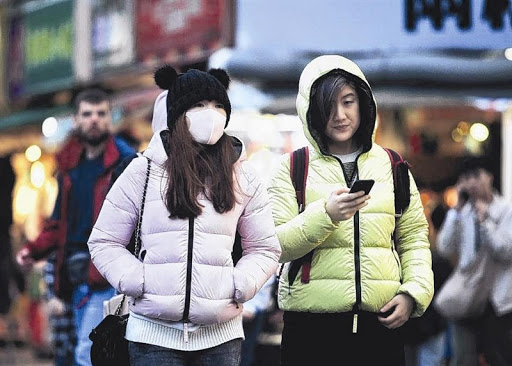

**Output:** bounding box ứng với mỗi khuôn mặt người trong ảnh đi kèm với phân lớp và độ chính xác việc dự đoán

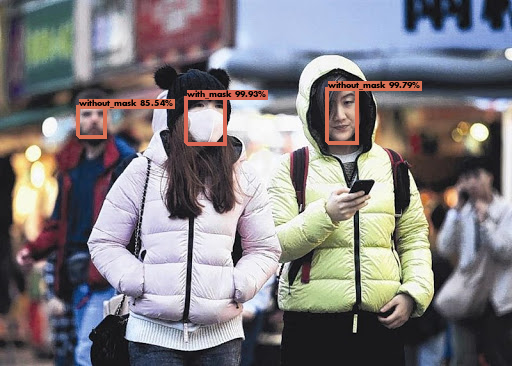

# 2. DATASET



*   Tập dữ liệu **Face Mask Detection** được lấy từ Kaggle. Để biết thêm về bộ dữ liệu xin hãy nhấn vào [đây](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection)

*   Tập dữ liệu này chứa 853 hình ảnh thuộc 3 lớp: Đeo khẩu trang, không đeo khẩu trang và đeo khẩu trang sai.



# 3. CÀI ĐẶT TUẦN TỰ

## 3.1. Phân tích và thiết kế




### **Worklflow**

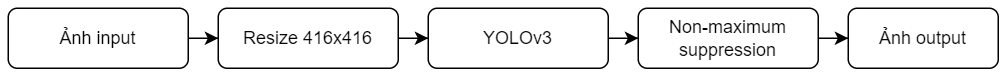

### **Cấu trúc của mô hình YOLOv3**
Là một mạng CNN bao gồm 106 layers, trong đó 
- 53 Layers đầu là mạng trích xuất đặc trưng Darknet (màu tím trong biểu đồ.
- 53 Layers sau hệ thống lớp tích chập để dự đoán kết quả đầu ra.

YOLOv3 thực hiện dự đoán kết quả ở 3 cấp độ bằng cách chia ảnh ảnh thành các ô (Grid cell) nhỏ, kích thước ô ở 3 cấp độ là:
- Cấp độ 1 (52x52): Phát hiện vật thể nhỏ
- Cấp độ 2 (26x26): Phát hiện vật thể trung bình
- Cấp độ 3 (13x13): Phát hiện vật thể lớn

Mô hình có tận dụng kiến trúc Feature Pyramid Networks (FPN) để tận dụng tối ưu các đặc trưng được trích xuất từ phần dưới cho các kiến trúc ở trên. Tức các feature ở cấp độ 3 ngoài để dự đoán các vật thể lớn còn được tái sử dụng và kết hợp (Concatenate) với các đặc trưng ở cấp độ 2 để dự đoán các vật thể trung bình. Tương tự như các đặc trung ở cấp độ 2 và cấp độ 1

|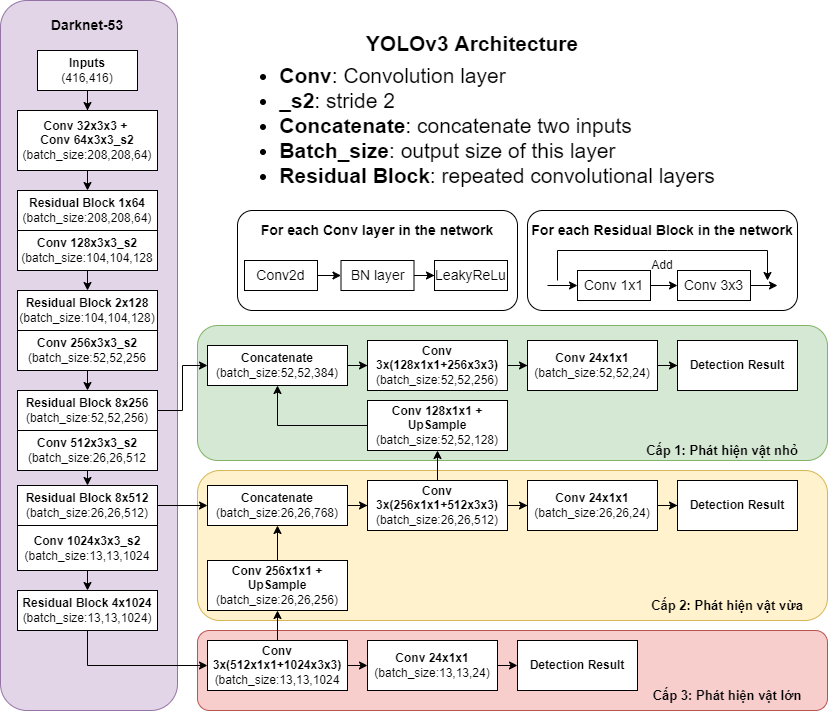|
|:--:|

#### Lớp tích chập (Convolution layers)

- Là thành phần cơ bản nhất của một mô hình Convolution Neural Network. Mỗi lớp tích chập bao gồm nhiều ma trận vuông (hay còn gọi là kernel hay filter), các giá trị trong ma trận vuông này là các giá trị mà mô hình phải học. 

|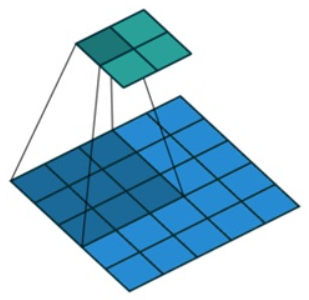|
|:--:|

- Trong ảnh ở trên, một ma trận vuông 3x3 di chuyển qua tất cả các pixel của một ảnh và thực hiện phép tích chập (Convolution) với một ảnh input có kích thước 5x5 với stride = 2 (số ô mà ma trận vuông nhảy qua sau mỗi lần di chuyển). Output là một ma trận có kích trước 2x2. Ma trận này được gọi là đặc trưng của bức ảnh trên sau thực hiện tích chập.

|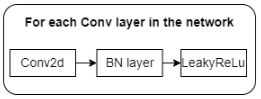|
|:--:|

- Trong YOLOv3, tất cả các lớp Convolution đều được theo sau bởi 2 lớp Batch Normalization và hàm kích hoạt Leaky ReLu

#### Residual Block

|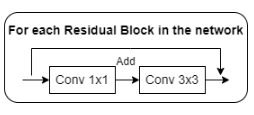|
|:--:|

- Residual hay còn được gọi Skip Connection, theo sau các lớp tích chập, được dùng để kết hợp output của lớp tích chập trước đó với output của lớp tích chập hiện tại.
- Với các Deep Neural Network như YOLOv3, các Residual Block này sẽ giúp tránh cho việc mô hình bị overfiting.

#### Concatenate Layer

|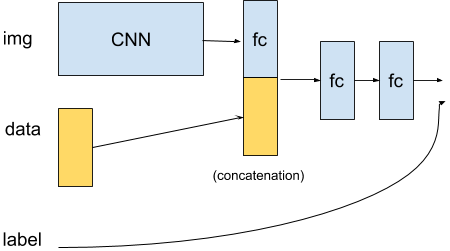|
|:--:|

Hiểu đơn giản là kết hợp output của 2 lớp tích chập lại với nhau

#### Upsampling Layers

|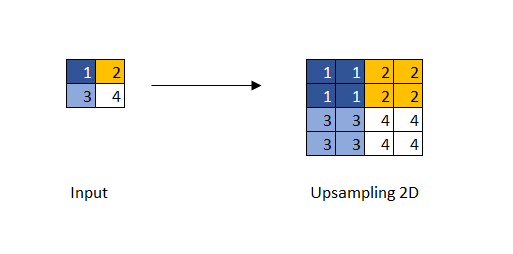|
|:--:|

Có tác dụng tăng kích thước của một ma trận đầu vào

#### Batch normalization

Chuẩn hóa các đặc trưng về trạng trái zero-mean (trung bình bằng 0) với độ lệch chuẩn bằng 1, tác dụng của BN trong quá trình huấn luyện mạng học sâu bao gồm:
- Loại bỏ vấn đề high variance, tức các đặc trưng có các thành phần rất lớn hoặc rất nhỏ, dẫn đến trong quá trình học, các vector gradient sẽ có giá trị quá lớn hoặc quá nhỏ dẫn đến việc học của model không được ổn định.
- Loại bỏ vấn đề vanishing gradient khiến cho các trọng số không thể học được
- Có vai trò giảm thiểu overfiting

#### Leaky ReLu activation

|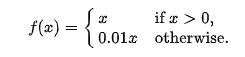|
|:--:|

Nếu giá trị trong kernel dương thì được đi qua còn nếu âm trả về một số âm rất nhỏ.

### **Output của mô hình YOLO:** 
Output của model ở cả 3 scale như sau

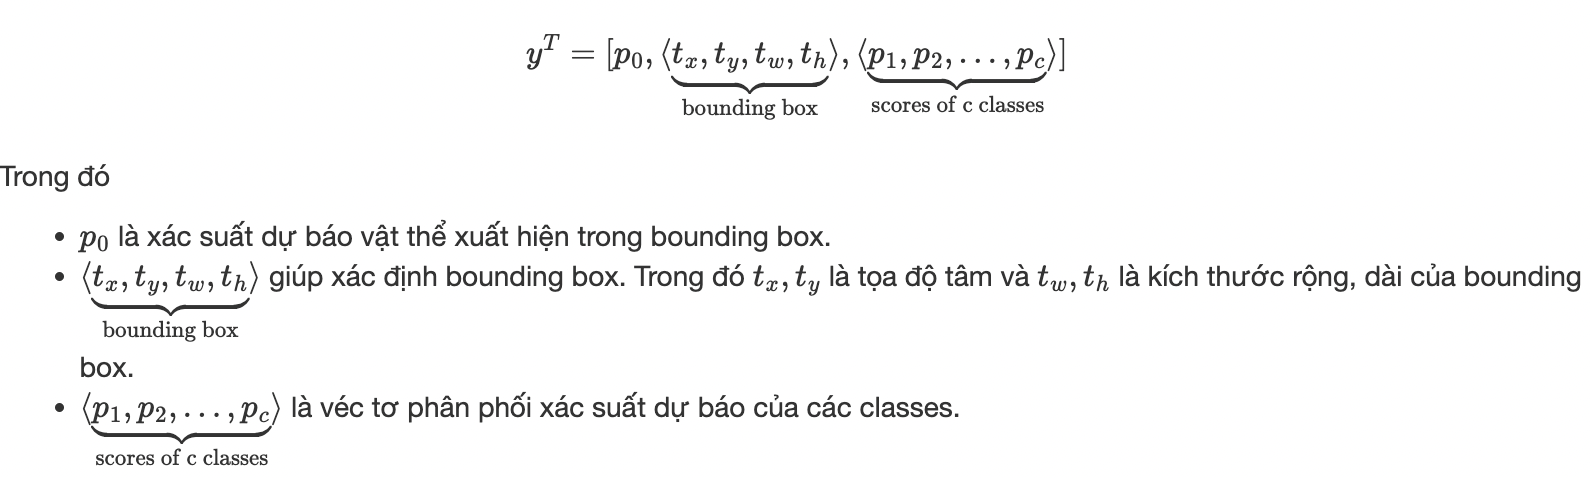

### **Non-maximum suppression**
Output đầu ra của mô hình sẽ có nhiều bounding box chồng lên nhau và dự đoán cùng một vật thể. Công việc của Non-maximum Suppression là loại bỏ bớt các box trùng nhau này

|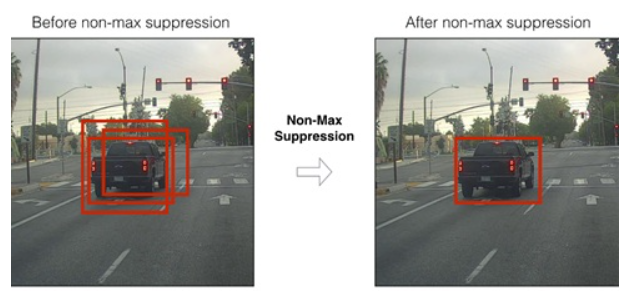|
|:--:|

## 3.2. Code tuần tự có sử dụng Tensorflow

### Download necessary file

In [ ]:
# download weight for YOLO
!gdown --id 12hTWIBAWQXuDF4xpjsi1JDUlcYWRoowx
# clone github repo
!git clone https://github.com/TranPhu1999/Parallel_programing_face_mask_detection.git
# download img for testing
!gdown --id 16H0NdwhOm-FFzar2rr0jETyKhXcGwamC


In [ ]:
!python /content/Parallel_programing_face_mask_detection/faceMaskDetectionTF.py -image "/content/maksssksksss0.png" -weight "/content/yolov3_mask.weights"

loading model...
weights loaded
classes loaded
detections:
	with_mask, 0.9992993474006653, [0.3654261  0.2731181  0.44238415 0.39748648]
	without_mask, 0.9979370832443237, [0.64145535 0.246794   0.7007857  0.39380205]
	without_mask, 0.8553689122200012, [0.15514062 0.2965486  0.20811437 0.37790096]
time: 6.461125135421753


## 3.3. Code tuần tự sử dụng jit

In [ ]:
!python /content/Parallel_programing_face_mask_detection/faceMaskDetection.py -image "/content/maksssksksss0.png" -weight "/content/yolov3_mask.weights"

(1, 416, 416, 32)
(1, 208, 208, 64)
(1, 104, 104, 128)
(1, 52, 52, 256)
(1, 26, 26, 512)
Conv:  154.43279790878296
Yolo Box:  0.43825340270996094
Non-max supperession:  5.3715126514434814
detections:
	with_mask, 0.9985343753546237, [0.36705263 0.27461387 0.44196454 0.39480403]
	without_mask, 0.9979581138081981, [0.64119921 0.24932172 0.70182386 0.39090848]
	without_mask, 0.7482101756149251, [0.15064399 0.2961845  0.21312098 0.36745956]
time: 162.34031891822815


## 3.4. Đánh giá

- Model được tự build lại tốn thời gian hơn nhiều so với model build bằng TF, lý do có thể là nhóm đã tự build lại hết tất cả các hàm bằng numpy cộng với việc mô hình có cấu trúc khá lớn
- Tốn thời gian nhất vẫn là phần nhân corellate2d tuy đã có tốc độ nhanh hơn của scipy nhưng xem ra vẫn chưa đủ nhanh

#  4. CÀI ĐẶT SONG SONG

## 4.1. Song song hóa lần 1

### a) Phân tích và thiết kế

Nhóm quyết định song song hóa các hàm là nhân của YOLO convolution bao gồm:
- Correllate2d
- ReLU activation
- Sigmoid

### b) Cài đặt

In [ ]:
!python /content/Parallel_programing_face_mask_detection/faceMaskDetectionParallel_v1.py -image "/content/maksssksksss0.png" -weight "/content/yolov3_mask.weights"

## c) Đánh giá

- Khá kì lạ khi hàm song song Correlate2d dù là song song trên host hay trên CPU đều không thể nhanh hơn jit nopython=True
- ReLU activation và Sigmoid không thực sự cải thiện tốc độ của model

## 4.2. Song song hóa lần 2 (Chưa kịp thời gian làm)


### a) Phân tích và thiết kế

### b) Cài đặt

### c) Đánh giá

# 5. TỔNG KẾT

| <font size="4"> Tuần tự với tesorflow</font> | <font size="4"> Tuần tự full numpy</font> | <font size="4"> Tuần tự numpy + jit</font> | <font size="4"> Song song</font> |
|---|---|---|---|
| <font size="4"> 7s </font>| <font size="4"> > 1h </font>| <font size="4"> 160s </font>| <font size="4"> > 150s </font> |

# 5. NHÌN LẠI QUÁ TRÌNH LÀM ĐỒ ÁN

**Khó khăn:**
- Khó khăn ban đầu trong quá trình làm việc nhóm
- Bởi vì nhóm quyết định viết lại Numpy cho toàn bộ mô hình nên khá thất vọng khi code tuần tự lại thua xa so với TF vậy
- Mô hình Yolo v3 còn phức tạp dẫn đến khó hiểu và xây dựng lại.
- Phát sinh các lỗi khi thực hiện song song hoá(một số hàm vẫn chưa tìm ra cách giải quyết như hàm **correlate2d**).
- Phát sinh các lỗi trong quá trình **jit** các hàm.


**Kinh nghiệm:**
- Hiểu sâu cấu trúc và áp dụng được mô hình Yolo v3.
- Biết cách song song hoá một ứng dụng thực tế.
- Tích luỹ kinh nghiệm làm việc nhóm.
- Biết cách xây dựng mô hình nhận dạng vật thể từ đầu mà không dùng thư viện
- Sử dụng các công cụ hổ trợ như github, google colab,...

Dự định của nhóm nếu còn thời gian:


*   Song song hoá những hàm nhóm chưa song song được.


*   Tối ưu các hàm hiện tại để tăng thêm tốc độ nhận dạng.


*   Phát triển ứng dụng để có thể nhận dạng trên video.



# 6. TÀI LIỆU THAM KHẢO



1.   https://dev.to/afrozchakure/all-you-need-to-know-about-yolo-v3-you-only-look-once-e4m#:~:text=Regarding%20the%20architecture%3A,underlying%20architecture%20for%20YOLO%20v3.
2.   https://phamdinhkhanh.github.io/2020/03/09/DarknetAlgorithm.html#:~:text=H%C3%ACnh%204%3A%20C%C3%A1c%20feature%20maps,l%C3%A0%2013x13%20%2C%2026x26%20v%C3%A0%2052x52%20.
3. https://bestinau.com.au/yolov3-architecture-best-model-in-object-detection/

4. https://docs.scipy.org/doc//scipy-1.3.0/reference/generated/scipy.signal.correlate2d.html

5. https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

6. https://towardsdatascience.com/non-maxima-suppression-139f7e00f0b5

7. https://meghal-darji.medium.com/implementing-bilinear-interpolation-for-image-resizing-357cbb2c2722